<a href="https://colab.research.google.com/github/arzucivelekoglu/basic-opencv-subjects/blob/main/3_Color_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Color Spaces**

Bir RGB görüntüsünün renk kanallarını tek tek görüntüleyeceğiz.

In [1]:
# bu kod ile yazılan adresteki zipli dosyayı indiriyoruz
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip

--2023-01-20 13:23:13--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.78
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip.2’

images.zip.2        100%[===================>]  28.22M  19.8MB/s    in 1.4s    

2023-01-20 13:23:14 (19.8 MB/s) - ‘images.zip.2’ saved [29586716/29586716]



In [2]:
#indirilen veya kendi zipli dosyalarımızı da aşağıdaki gibi dışarı aktarıyoruz
!unzip -qq images.zip

replace images/castara.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

(-0.5, 579.5, 358.5, -0.5)

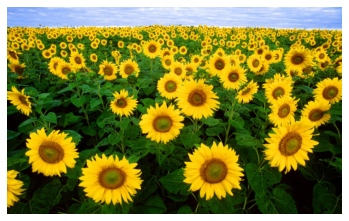

In [52]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/images/Sunflowers.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

RGB formatında kanal sıralaması aşağıdaki gibidir.


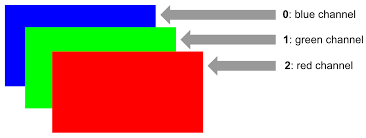


OpenCV `split()` fonksiyonu ile görüntünün kanallarını ayırıyoruz.

In [53]:
print(f"imgae shape: {image.shape}")
print(f"image ndim : {image.ndim}")

imgae shape: (359, 580, 3)
image ndim : 3


In [54]:
B, G, R = cv2.split(image)

print(B.shape)
print(G.shape)
print(R.shape)

(359, 580)
(359, 580)
(359, 580)


In [55]:
B.ndim

2

Text(0.5, 1.0, 'R')

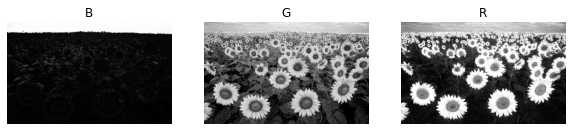

In [56]:
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 3, 1) 
plt.imshow(B, cmap="gray")
plt.axis('off')
plt.title(f"B")

fig.add_subplot(1, 3, 2)
plt.imshow(G, cmap="gray")
plt.axis('off')
plt.title(f"G")

fig.add_subplot(1, 3, 3)
plt.imshow(R, cmap="gray")
plt.axis('off')
plt.title(f"R")

In [8]:
# orjinal görüntü boyutunda 0'lardan oluşan bir matris oluşturuyoruz

import numpy as np

zeros = np.zeros(image.shape[0:2], dtype='uint8')
 
r = cv2.merge([zeros, zeros, R])
g =  cv2.merge([zeros, G, zeros])
b = cv2.merge([B, zeros, zeros])


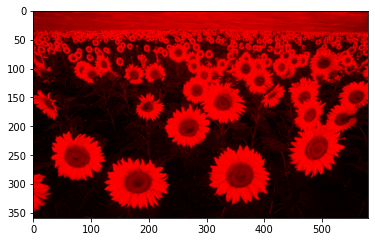

In [9]:
# Red
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))


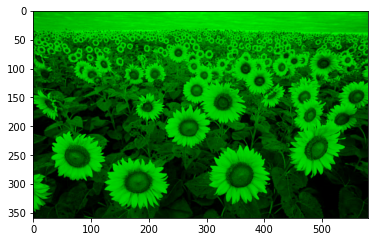

In [10]:
# Green
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))


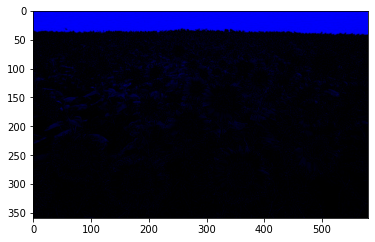

In [11]:
# Blue
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))

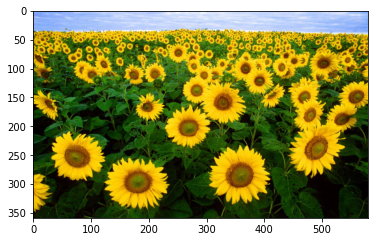

In [12]:
# Ayırdığımız kanlları tekrar birleştirerek orjinal görüntüyü tekrar elde edebiliriz
merged = cv2.merge([B, G, R])
plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))

# **The HSV Color Space**

**HSV (hue, saturation, value) - HSV (ton, doygunluk, değer)**

HSV renk tekerleği bazen bir koni veya silindir olarak görünür, ancak her zaman şu üç bileşenle birlikte:

**Hue - Renk tonu**

Hue (Ton), modelin 0 ila 360 derece arasında bir sayı olarak ifade edilen renk kısmıdır:

**Saturation - Doyma**

Saturation (Doygunluk), belirli bir renkteki gri miktarını yüzde 0 ila 100 arasında tanımlar. Bu bileşenin sıfıra düşürülmesi daha fazla gri ortaya çıkarır ve soluk bir etki üretir. Bazen doygunluk, 0 ile 1 arasında bir aralık olarak görünür; burada 0 gridir ve 1 ana renktir.

**Value (or Brightness) - Değer (veya Parlaklık)**

Değer, doygunlukla birlikte çalışır ve rengin parlaklığını veya yoğunluğunu yüzde 0'dan yüzde 100'e kadar tanımlar; burada 0 tamamen siyahtır ve 100 en parlaktır ve en fazla rengi ortaya çıkarır.


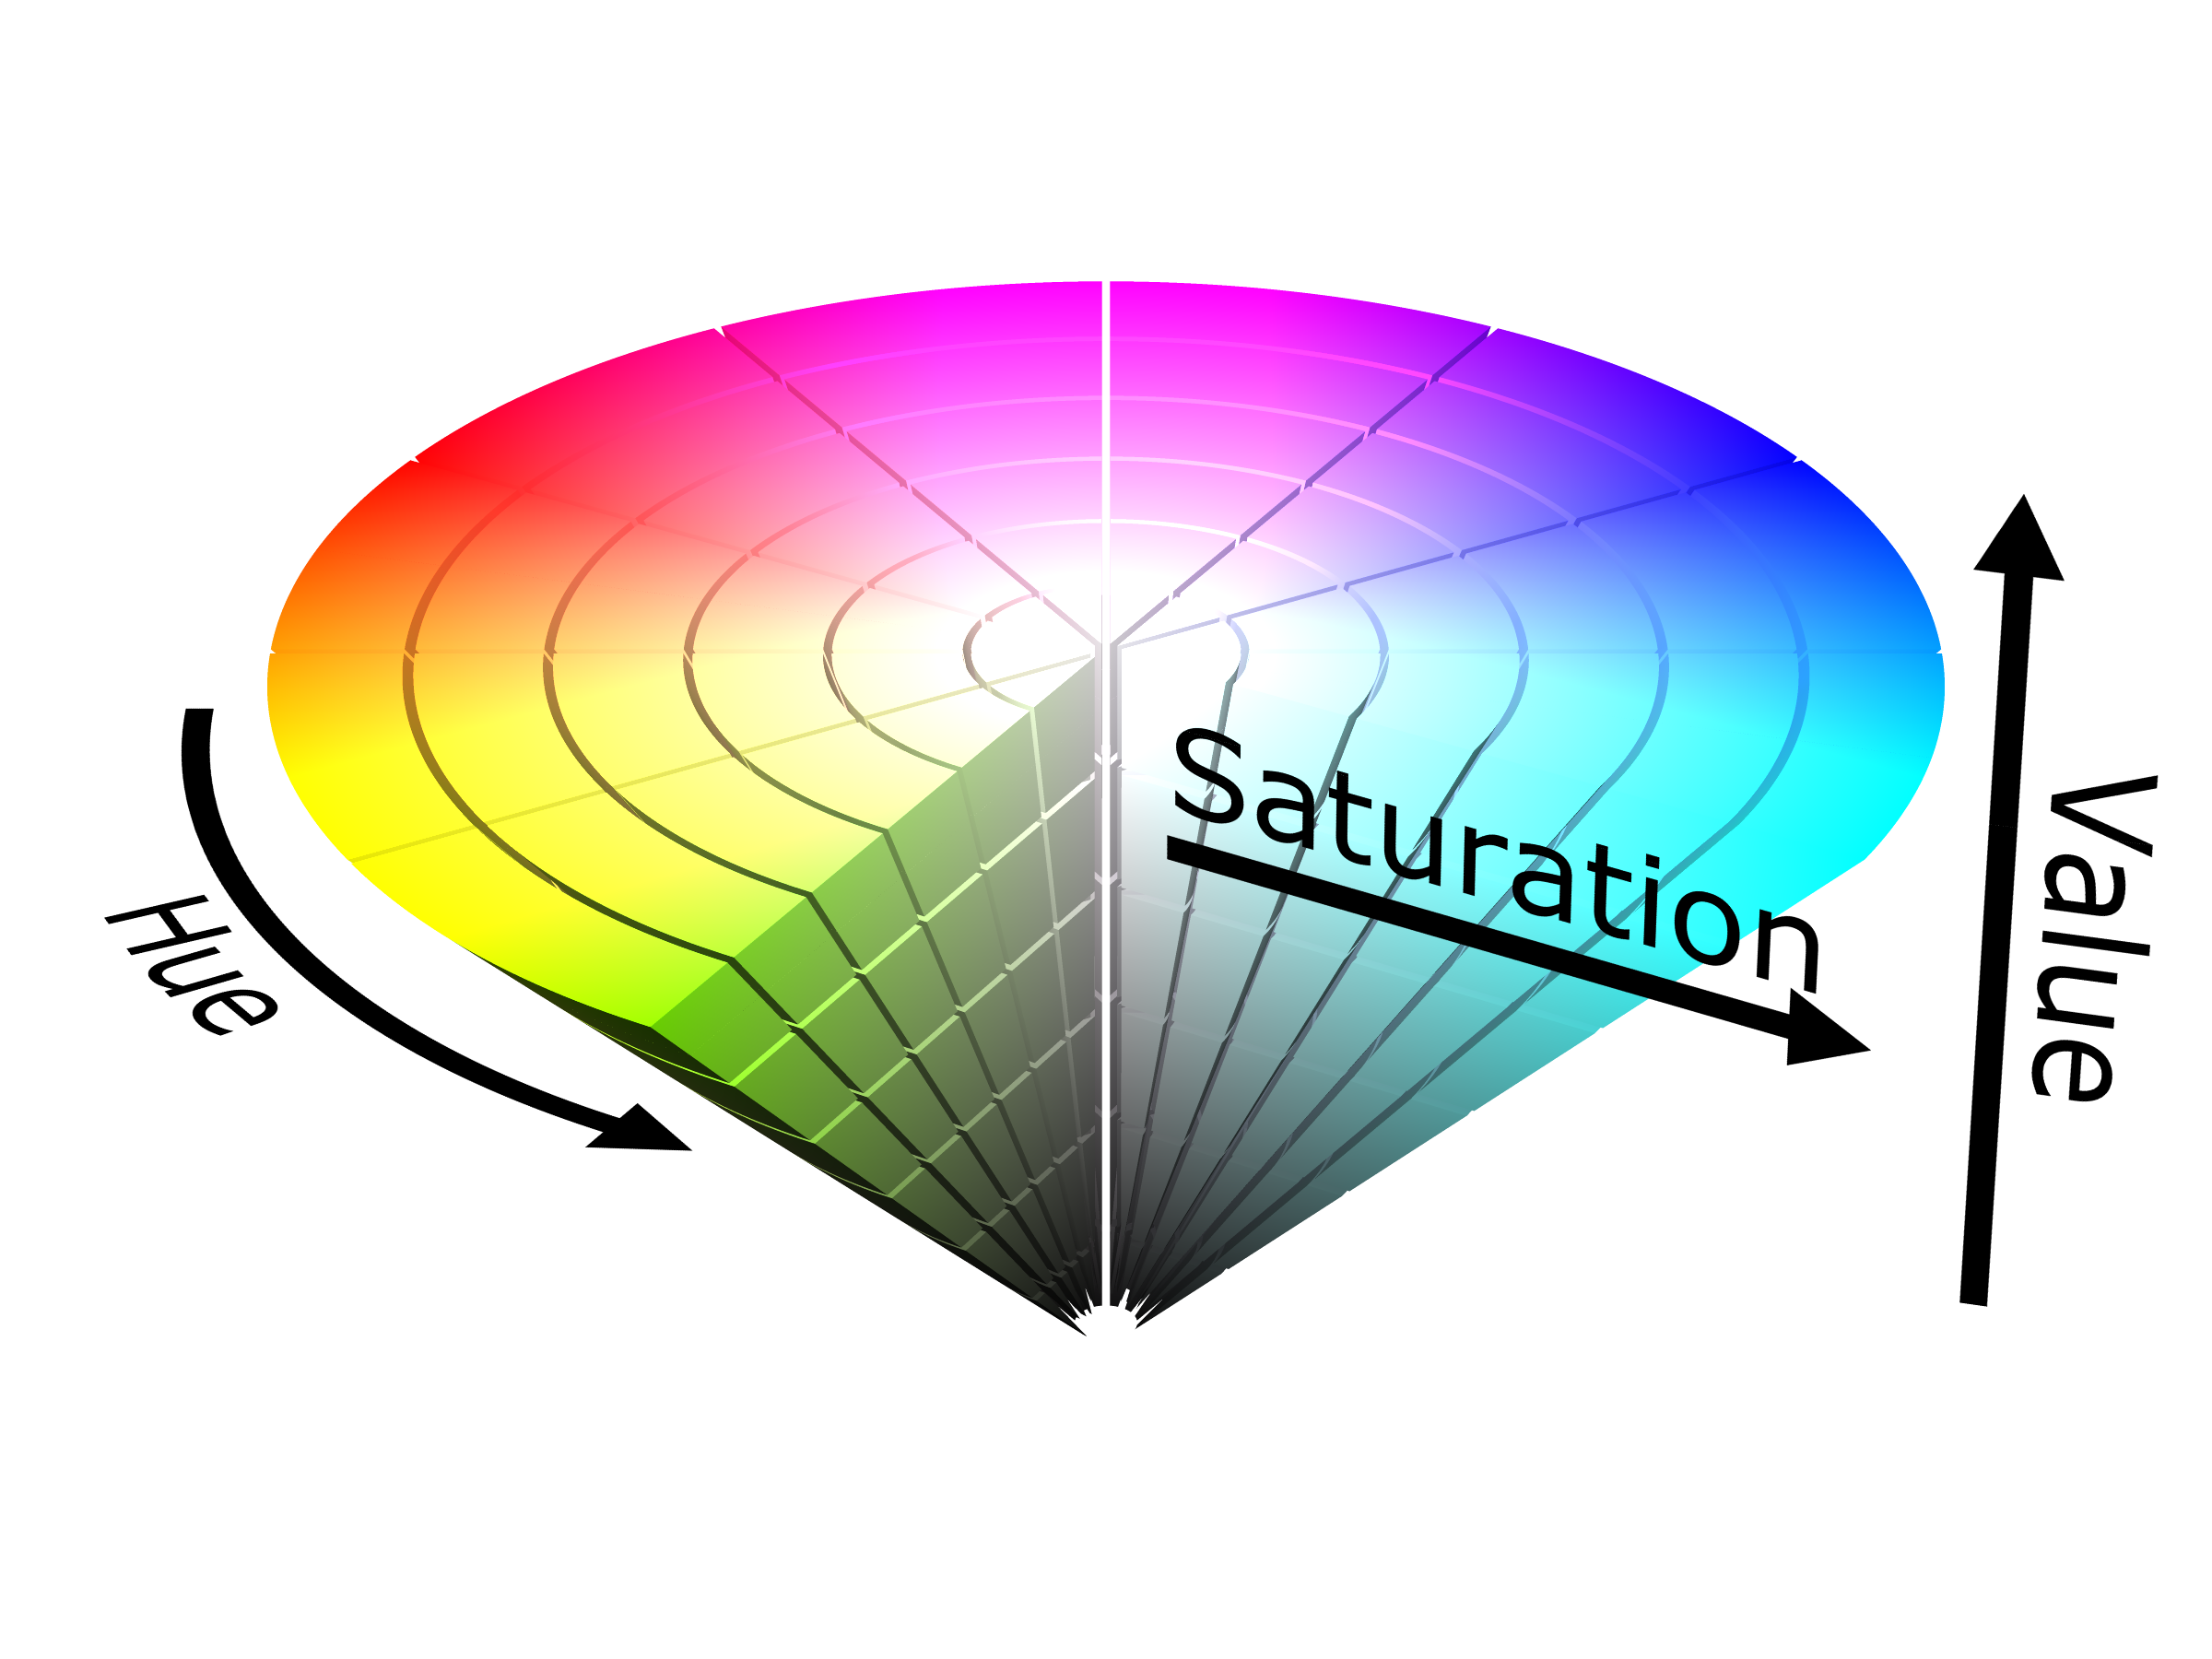

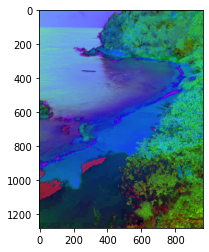

In [14]:
image = cv2.imread('./images/castara.jpeg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)